## Load Data 

In [144]:
import seaborn as sns
sns.set()

In [145]:
import pandas as pd

df = pd.read_csv("../data/all.csv")
print (list(enumerate(df.columns)))

[(0, 'Age'), (1, 'Album_Name'), (2, 'Artist'), (3, 'Year'), (4, 'Description'), (5, 'Age Group'), (6, 'Album_ID'), (7, 'Album_Name_Spotify'), (8, 'Artists_Spotify'), (9, 'Track_ID'), (10, 'ISRC'), (11, 'Track_Name'), (12, 'Artists'), (13, 'popularity'), (14, 'preview_url'), (15, 'image_url'), (16, 'danceability'), (17, 'energy'), (18, 'key'), (19, 'loudness'), (20, 'mode'), (21, 'speechiness'), (22, 'acousticness'), (23, 'instrumentalness'), (24, 'liveness'), (25, 'valence'), (26, 'tempo'), (27, 'type'), (28, 'uri'), (29, 'track_href'), (30, 'analysis_url'), (31, 'duration_ms'), (32, 'time_signature'), (33, 'lyrics')]


In [146]:
df['duration_min'] = df['duration_ms']/10**3/60

df = df.astype({'key': 'Int64', 'mode':'Int64', 'time_signature':'Int64'})


columns = ['Track_ID','Track_Name','Artists', 'Age','key','mode', 'time_signature', 
           'popularity','duration_min', 'danceability', 'energy', 'loudness',  'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df = df[columns]

In [147]:
print (list(enumerate(df.columns)))

[(0, 'Track_ID'), (1, 'Track_Name'), (2, 'Artists'), (3, 'Age'), (4, 'key'), (5, 'mode'), (6, 'time_signature'), (7, 'popularity'), (8, 'duration_min'), (9, 'danceability'), (10, 'energy'), (11, 'loudness'), (12, 'speechiness'), (13, 'acousticness'), (14, 'instrumentalness'), (15, 'liveness'), (16, 'valence'), (17, 'tempo')]


In [148]:
df.head(3)

,Track_ID,Track_Name,Artists,Age,key,mode,time_signature,popularity,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FPQI1LRwWszttbRG8hknk,Games Monsters Play,"['Herry Monster', 'Grover']",2,7,1,4,5,3.404450,0.738,0.544,-8.557,0.346,0.212,0.0,0.0937,0.961,144.448
1,6pOoswwC1lNBI2TapMdaEW,Afraid of the Dark,['Telly Monster'],2,0,1,4,5,2.354000,0.505,0.525,-10.897,0.109,0.355,0.0,0.1000,0.444,127.922
2,2EEwSq98rKwlRWT7sNCLRc,Eensy Weensy Spider,"['Count Von Count', 'The Sesame Street Kids']",2,0,1,4,9,1.578217,0.875,0.338,-11.382,0.397,0.762,0.0,0.0992,0.962,116.027


# Inspect Linear Relationship between Variables

<AxesSubplot:>

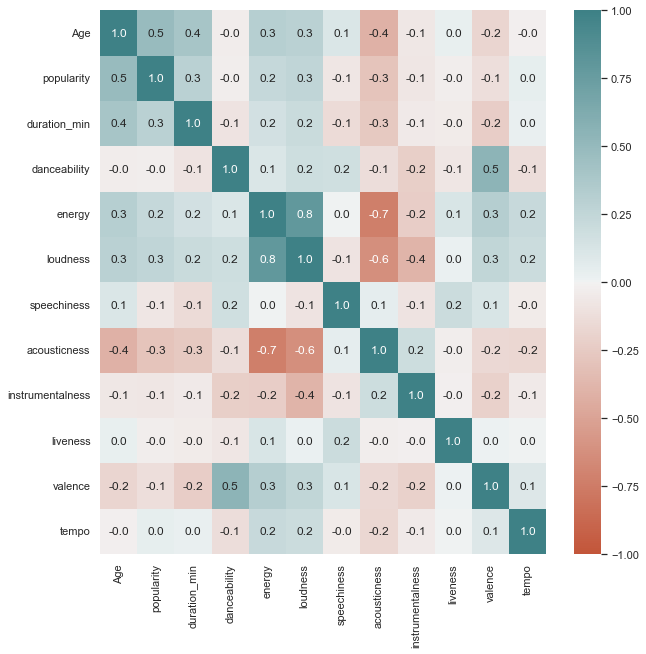

In [149]:
#df.loc[:, 'Age':].corr() 

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) 

numerical_columns = ['Age', 'popularity','duration_min', 'danceability', 'energy', 'loudness',  'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df_num = df[numerical_columns]

sns.heatmap(df_num.corr(), 
            vmin=-1, vmax=1, cmap=sns.diverging_palette(20,200,as_cmap=True),
            annot = True, fmt=".1f")

## Summary for Variable Correlation


- `Age` is most positively correlated to `popularity` and `duration`, and most negatively related to `accousticness`.
- `Energey` and `loudness` are the two most correlated variables.

# Inspect Non-Linear Relationship between Variables

<AxesSubplot:xlabel='energy', ylabel='loudness'>

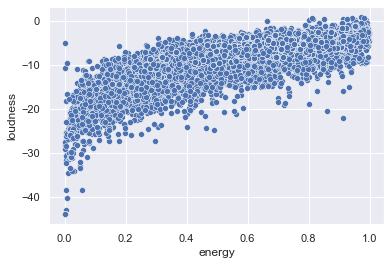

In [150]:
sns.scatterplot(data= df, x='energy', y='loudness')

<AxesSubplot:xlabel='Age', ylabel='popularity'>

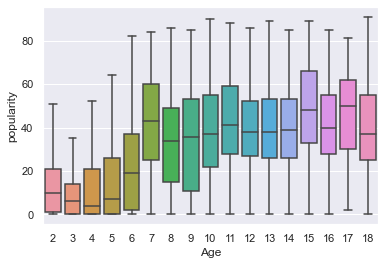

In [162]:
sns.boxplot(x="Age", y="popularity", data=df.dropna(), showfliers=False)

<AxesSubplot:xlabel='Age', ylabel='duration_min'>

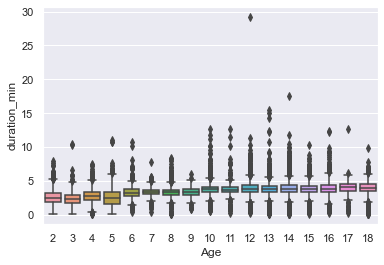

In [160]:
sns.boxplot(x="Age", y="duration_min", data=df.dropna()); # keep outliers

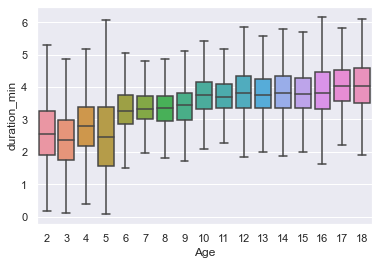

In [161]:
sns.boxplot(x="Age", y="duration_min", data=df.dropna(), showfliers = False);   # remove outliers

In [153]:
df_age = df.groupby('Age').mean()

In [154]:
df_age.columns

Index(['key', 'mode', 'time_signature', 'popularity', 'duration_min',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

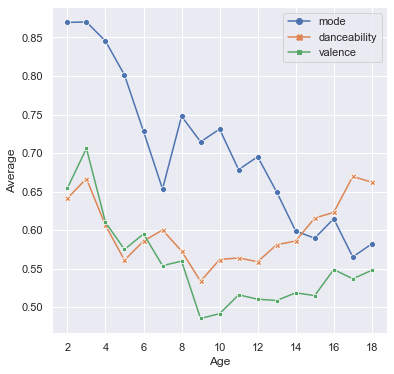

In [155]:
plt.figure(figsize=(6,6)) 
sns.lineplot(data=df_age[['mode','danceability','valence']],markers=True, dashes=False)
plt.ylabel("Average");